<a href="https://colab.research.google.com/github/pkchen1129/Machine-Learning/blob/master/ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0.Setup** 

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from numpy import linalg as NORM
import matplotlib.pyplot as plt


In [5]:
#Load the data.
q2xTrain = np.load('/content/drive/My Drive/Colab Notebooks/ML/q2xTrain.npy')
q2yTrain = np.load('/content/drive/My Drive/Colab Notebooks/ML/q2yTrain.npy')
q2xTest = np.load('/content/drive/My Drive/Colab Notebooks/ML/q2xTest.npy')
q2yTest = np.load('/content/drive/My Drive/Colab Notebooks/ML/q2yTest.npy')
q2xTrain = np.array([q2xTrain])
q2xTrain = q2xTrain.T
q2yTrain = np.array([q2yTrain])
q2yTrain = q2yTrain.T
q2xTest = np.array([q2xTest])
q2xTest = q2xTest.T
q2yTest = np.array([q2yTest])
q2yTest = q2yTest.T
#----------------------------------------------------------------------------
q3x = np.load('/content/drive/My Drive/Colab Notebooks/ML/q3x.npy')
q3y = np.load('/content/drive/My Drive/Colab Notebooks/ML/q3y.npy')


q3x = np.array([q3x])
q3x = q3x.T
q3y = np.array([q3y])
q3y = q3y.T



#----------------------------------------------------------------------------
q1x = np.load('/content/drive/My Drive/Colab Notebooks/ML/q1x.npy')
q1y = np.load('/content/drive/My Drive/Colab Notebooks/ML/q1y.npy')
# q1x = np.array([q1x])
# q1x = q1x.T
q1y = np.array([q1y])
q1y = q1y.T

# print(q2xTrain.shape)
# print(q2yTrain.shape)
# print(q2xTest.shape)
# print(q2yTest.shape)
print(q3x.shape)
print(q3y.shape)
print(q3x.shape)
print(q3y.shape)

print(q1x.shape)
print(q1y.shape)




## plot the train data
# plt.plot(q2xTrain, q2yTrain, 'ro')
# plt.show()

# plt.plot(q2xTest, q2yTest, 'ro')
# plt.show()

(100, 1)
(100, 1)
(100, 1)
(100, 1)
(99, 2)
(99, 1)


# **1.Logistic regression**

##(a)




##(b)(c)
Using the H you calculated in part (a), write down the update rule implied by Newton’s method for optimizing l(w). Now use this rule (and not a library function) to implement Newton’s method and apply it to binary classification problem specified in files q1x.npy and q1y.npy. The two columns of q1x.npy represent the inputs (x(i)) and q1y.npy represents the outputs (y(i) ∈ {0, 1}), with one training example per row. Initialize Newtons method with w = 0 (the vector of all zeros). What are the coefficients w, including the intercept term, resulting from your fit?


w =  [[ 0.02603861]
 [-0.01679403]]


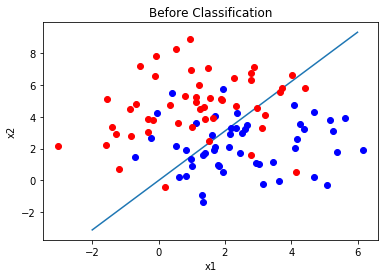

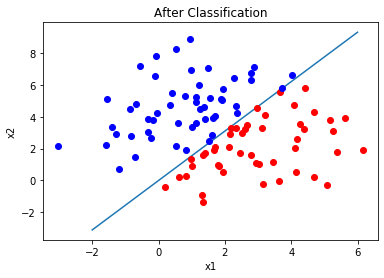

In [20]:
iteration = 500
rate = 0.01
w = np.array([[0.0],[0.0]])

def sigmoid(x, w): 
                                                           
    z = w.T @ x           
    return 1.0 / (1.0 + np.exp(-z))

D = np.zeros((q1x.shape[0],q1x.shape[0]))    

for j in range(iteration):
  #setting D 
  for i in range(q1x.shape[0]):
    # print(sigmoid( q1x.T , w ).shape)
    D[i,i] = sigmoid( q1x.T , w ) @ (np.ones((1,sigmoid( q1x.T , w ).shape[1])) - sigmoid( q1x.T , w )).T
  #Hessian
  H = - q1x.T @ D @ q1x
  #grad
  grad = q1x.T @ (sigmoid(q1x.T,w).T - q1y)
  w = w - rate * np.linalg.inv(H) @ grad    #Formula for Newon Method
p = sigmoid(q1x.T,w) #true

# print("cost = ", cost)
print("w = ", w) #(-0.62, -1.849)
#--------------------------------------------------------
##plotting
t = np.linspace(-2, 6, 100)
ploty = -w[0,0]/w[1,0] * t
plt.plot(t,ploty)

plt.xlabel('x1')
plt.ylabel('x2')
for i in range(99):
  if q1y[i,0] > 0.5 :
    # out[0,i] = 1
    plt.plot(q1x[i,0],q1x[i,1],'ro')
  else :
    # out[0,i] = 0
    plt.plot(q1x[i,0],q1x[i,1],'bo')
plt.title('Before Classification')
plt.show()

#---------------------------------
t = np.linspace(-2, 6, 100)
ploty = -w[0,0]/w[1,0] * t
plt.plot(t,ploty)

for i in range(99):
  if p[0,i] > 0.5 :
    # out[0,i] = 1
    plt.plot(q1x[i,0],q1x[i,1],'ro', label = '>0,5')
  else :
    # out[0,i] = 0
    plt.plot(q1x[i,0],q1x[i,1],'bo',label = '<0,5')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('After Classification')
# plt.legend()
plt.show()




# **2.Linear Regression on a polynomial**


## 2(a)
For each of the following optimization methods, find the coefficients (slope and intercept) that minimize the error for a first degree polynomial.

### (i)Batch Solution
For Batch Solution, it sums up all the data(20 for this example) everytime they iterate through. 

The cost(E(**w**)) would be smaller when approaches the convex point, which means the minima. As long as the cost value is still big, I keep increasing the # of iteration and find the time when cost stabalizes.

When the iteration is 600, the cost reduce to 0.099 which is smaller than 0.2 as requred and stablized without increasing. At the moment, $w = [w_0, w_1] = [1.944,-2.82026]$

In [21]:
#### Batch Gradient Descent
rate = 0.01
iteration = 600
##initialize-------------------------------------
w = np.array([[0.01] ,[0.02]])                          #Initialize w
cost = 0                                              #Initialize cost
PHI = np.vstack(( np.ones((20,1)).T , q2xTrain.T )).T #Define the bi PHI for vectorization
Y = q2yTrain

## The vectorized method(using big PHI)-----------
for j in range(iteration):
  grad = PHI.T @ (PHI @ w - Y)
  w = w - rate * grad
  

#Calculate the cost--------------------------------
cost = (PHI @ w - Y).T @ (PHI @ w - Y)/2/20
print("Cost = ", cost)
print("w = ",w)
# print("grad = ",grad)
#--------------------------------------------------------------


Cost =  [[0.09937779]]
w =  [[ 1.944959  ]
 [-2.82026179]]


###(i)Stochastic Method
For Stochastic Method, when the loop counts to 100000, the rate = 0.001, the cost reduce to 0.099 which is smaller than 0.2 as requred and $w = [w_0, w_1] = [1.93625391,-2.81421521]$

In [25]:
####Stochastic gradient descent
rate = 0.001
iteration = 100000
##initialize
w = np.array([[1.5] ,[-2]])
# phi = np.array([[0],[0]])
# grad = np.array([[0.5],[0.5]]) #(W^T * phi - y) * phi

#----------------------------------------------------
for j in range(iteration):
  randomidx = np.random.randint(20, size=1) #Using the random index
  phi = np.array([[1],[q2xTrain[randomidx]]])
  grad = (w.T @ phi - q2yTrain[randomidx] ) * phi  #The y data is random
  w = w - rate * grad

#Calculate the cost
cost = (PHI @ w - Y).T @ (PHI @ w - Y)/2/20
print("Cost = ", cost)
print("w = ",w)
# print("grad = ",grad)


Cost =  [[array([[0.09963454]])]]
w =  [[array([[1.95796853]])]
 [array([[-2.80107531]])]]


###(i)Newton Method
Formula : $w = w - H^{-1} \Delta E$, for which $H = \Phi^T\Phi$

For Newton Method, when the loop counts to 120, the cost reduce to 0.099 which is smaller than 0.2 as requred and $w = [w_0, w_1] = [1.94689051,-2.82416996]$

Also, for this case, when rate is around 0.1, it took only 60 to converges. However, if the rate is 0.01, it took 6~7 times of time to converge.

In [29]:
####Newton Method
rate = 0.1
iteration = 120


##initialize
w = np.array([[0] ,[0]])
a = np.ones((20,1))
b = q2xTrain
PHI = np.hstack((a , b))
Y = q2yTrain


grad = np.array([[0.5],[0.5]]) #(W^T * phi - y) * phi

#----------------------------------------------------
for j in range(iteration):
  H = PHI.T @ PHI
  grad = PHI.T @ (PHI @ w - Y)
  w = w - rate * np.linalg.inv(H) @ grad    #Formula for Newon Method

#Calculate the cost
cost = (PHI @ w - Y).T @ (PHI @ w - Y)/2/20
print("Cost = ", cost)

print("w = ",w)
# print("grad = ",grad)


Cost =  [[0.09937726]]
w =  [[ 1.94689051]
 [-2.82416996]]


##(ii)

##2(b) Over-fitting

###(i) Newton's method finding best dimension w/o overfitting
Use Newton's method to find coefficient of polynomial(w)funcs with different degrees(0~9) and will discover overfitting problem.

RMS =  [[0.86062627]
 [0.44581894]
 [0.44468991]
 [0.24699351]
 [0.2333662 ]
 [0.23014848]
 [0.22741619]
 [0.22455504]
 [0.22454003]
 [0.21256024]]
RMS_test = [[0.74556728]
 [0.59390552]
 [0.59614154]
 [0.37486957]
 [0.36679003]
 [0.3577246 ]
 [0.37176129]
 [0.44414239]
 [0.42633389]
 [1.56589746]]


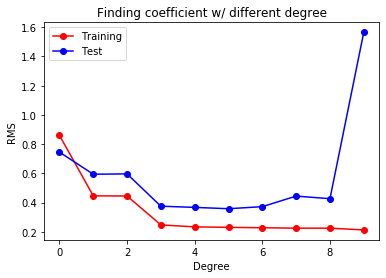

In [30]:
rate = 0.1
iteration = 600
##Some matrices data
Y = q2yTrain
Y_test = q2yTest
PHI = np.ones((20,1))
PHI_test = np.ones((20,1))

b = q2xTrain.T
w = np.zeros((1,1)) #####
RMS = np.zeros((10,1))
RMS_test = np.zeros((10,1))

#----------------------------------------------------
for i in range(10):
  for j in range(iteration):
    H = PHI.T @ PHI #Hessian 
    grad = PHI.T @ (PHI @ w - Y)
    w = w - rate * np.linalg.inv(H) @ grad
  
  E = 1/2*(PHI @ w - Y).T @ (PHI @ w - Y)
  RMS[i,0] = np.sqrt(2*E/20)[0,0]
  E_test = 1/2*(PHI_test @ w - Y_test).T @ (PHI_test @ w - Y_test)
  RMS_test[i,0] = np.sqrt(2*E_test/20)[0,0] 
  w = np.zeros((w.shape[0]+1,1)) #reshape the w

  add = np.power(q2xTrain.T,i+1)
  PHI = np.vstack((PHI.T,add)).T
  add_test = np.power(q2xTest.T , i+1)
  PHI_test = np.vstack((PHI_test.T , add_test)).T
print("RMS = ",RMS)
print("RMS_test =",RMS_test)

plt.xlabel('Degree')
plt.ylabel('RMS')
plt.plot(RMS, 'ro-', label = 'Training')
plt.plot(RMS_test, 'bo-', label = 'Test')
plt.title('Finding coefficient w/ different degree')
plt.legend()
plt.show()



(ii) 

Q:Which degree polynomial would you say best fits the data? Was there evidence of under/over-fitting the data? Use your generated charts to defend your answer.

A: **Degree 5** best fit the data since the cost value of **test data**is the smallest. As for the **training data**, it will keep reducing with the increasing degree. When the degree reaches **9**, the over-fitting phenomenon is obvious. 



##2(c)Regularization



###(i) Regularization solving over-fitting
Using Newton Method with regularization to solve overfitting

RMS =  [[0.21256024]
 [0.22763515]
 [0.23043614]
 [0.23412159]
 [0.25742655]
 [0.32181477]
 [0.35969621]
 [0.52047877]]
RMS_test = [[1.56589746]
 [0.37287548]
 [0.35894355]
 [0.35795053]
 [0.37635769]
 [0.45229393]
 [0.4601072 ]
 [0.47126681]]


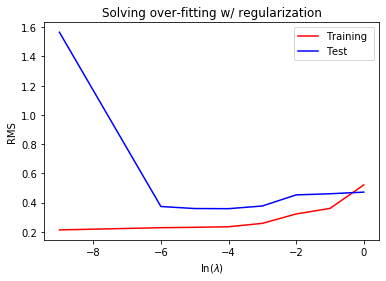

In [32]:
rate = 0.1
iteration = 600
##Some matrices data
Y = q2yTrain
Y_test = q2yTest
##Input PHI data
PHI = np.ones((20,10))
PHI_test = np.ones((20,10))
## Setting up and initialize
#PHI
for i in range(9):
  add = np.power(q2xTrain.T,i+1)
  add_test = np.power(q2xTest.T,i+1)
  PHI[:,i+1] = add
  PHI_test[:,i+1] = add_test

w = np.zeros((10,1)) 
RMS = np.zeros((8,1))
RMS_test = np.zeros((8,1))
lambdaa = np.array([0,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,1 ])
#----------------------------------------------------
for i in range(len(lambdaa)):    #Different Lambda
  for j in range(iteration):     #Iteration for training
    H = lambdaa[i]* np.eye(10) + PHI.T @ PHI #(delta^2 E) Hessian for regularization
    grad = lambdaa[i]* np.eye(10) @ w + PHI.T @ (PHI @ w - Y)  #delta E
    w = w - rate * np.linalg.inv(H) @ grad
  #Still using the normal cost and RMS to count
  E = 1/2*(PHI @ w - Y).T @ (PHI @ w - Y)  
  RMS[i,0] = np.sqrt(2*E/20)[0,0]
  E_test = 1/2*(PHI_test @ w - Y_test).T @ (PHI_test @ w - Y_test)
  RMS_test[i,0] = np.sqrt(2*E_test/20)[0,0] 
  w = np.zeros((10,1))           #reset w to zero
#----------------------------------------------------
lnn = np.array([[-9,-6,-5,-4,-3,-2,-1,0]]).T  #for plotting

print("RMS = ",RMS)
print("RMS_test =",RMS_test)

plt.xlabel('ln($\lambda$)')
plt.ylabel('RMS')
plt.title('Solving over-fitting w/ regularization')
plt.plot(lnn,RMS, 'r-', label = 'Training ')
plt.plot(lnn,RMS_test, 'b-', label='Test' )
plt.legend()
plt.show()


###(ii) 
When $\lambda$ = $10^{-4}$ , it seems to be working the best. For this problem, it successfully solved the over-fitting problem. 



# **3.Locally Weighted Linear Regression(Closed form)**
Consider a linear regression problem in which we want to weight different training examples differently.


##3(a)


##3(b)

##3(c)

##3(d)

###(i)Unweighted) linear regression
Using closed-form

w =  [[0.49073707]
 [0.26333931]]


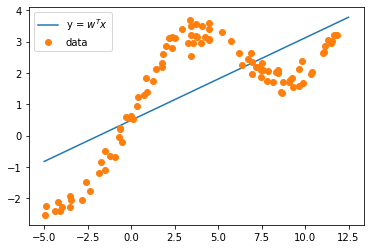

In [34]:
## Matrix Settings ----------------------
PHI = np.ones((100,2)) # 2nd degree
PHI[:,1] = q3x.T # PHI.shape = (100*2)
Y = q3y
H = PHI.T @ PHI


## Calculated ----------------------------
w = np.linalg.inv(H) @ PHI.T @ Y  ##Using closed-form
print("w = ", w)
x = np.linspace(-5, 12.5, 100)
plt.plot(x, w[1,0] * x + w[0,0], label = 'y = $w^Tx$')
plt.plot(q3x, q3y, 'o', label = 'data')
plt.legend()


###(ii) Locally Weighted Linear Regression with each query point
By weighting around each query point(-5~12.5), **though the dimension is still 2, the curvefits well with the data.**
> $r^{(i)} = e^{(-\frac{(x-x^{(i)})^2}{2\tau^2})}$ 

For which x(i) is the test data from 1~100, and x is the linspace data from -5 ~ 12.5. Each R matrix is having it's own x. Each iteration for each linspace point would have one y value.




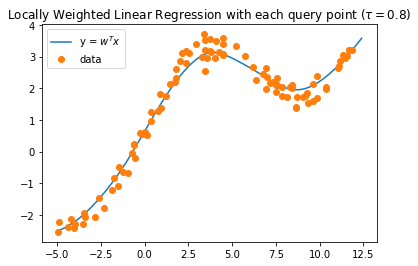

In [43]:
tau = 0.8
R = np.zeros((100,100))
PHI = np.ones((100,2)) # 2nd degree
PHI[:,1] = q3x.T
y = np.zeros(1000)
Y = q3y
#---------------------------------------------------------
for i in range(1000):
  x_range = -5 + (12.4 - (-5))/1000 * i
  for j in range(100): #count for setting up the R diagonal matrix
    r = np.exp(- (x_range - q3x[j,0])**2 / 2 * tau**2)
    R[j,j] = r
  H = PHI.T @ R @ PHI # R.shape = 100*100
  w = np.linalg.inv(H) @ PHI.T @ R @ Y 

  y[i] = w[1,0] * x_range + w[0,0]
##--------------------------------------------------------

x = np.linspace(-5, 12.4, 1000)
plt.title('Locally Weighted Linear Regression with each query point ($ τ = 0.8 $)')
plt.plot(x, y, label = 'y = $w^Tx$')
plt.plot(q3x, q3y, 'o', label = 'data')
plt.legend()
plt.show()

###(iii) Unweighted linear regression
Q:With different $\tau = 0.1,\ 0.3,\ 2,\ 10$

A:When using different $\tau= 0.1,\ 0.3,\ 2,\ 10$ value, it seems when  $\tau=2$, the best solution for that the plot matches the data sets the most. When the value is bigger, it seems over-fitting and trimble for the line. 

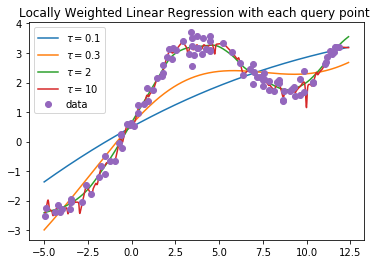

In [42]:
tau = np.array([0.1, 0.3, 2, 10])
R = np.zeros((100,100))
## Create PHI
PHI = np.ones((100,2)) # 2nd degree
PHI[:,1] = q3x.T
#Calculated ------------------------------
y = np.zeros((1000,4))
for k in range(4):
  for i in range(1000):
    x_range = -5 + (12.4 - (-5))/1000 * i
    for j in range(100): #count for 
      r = np.exp(- (x_range - q3x[j,0])**2 / 2 * tau[k]**2)
      
      R[j,j] = r
    H = PHI.T @ R @ PHI # R.shape = 100*100
    w = np.linalg.inv(H) @ PHI.T @ R @ Y 

    y[i,k] = w[1,0] * x_range + w[0,0]
## Plot ----------------------------------

x = np.linspace(-5, 12.4, 1000)
plt.title('Locally Weighted Linear Regression with each query point ')
plt.plot(x, y[:,0], label = '$τ = 0.1$')
plt.plot(x, y[:,1], label = '$τ = 0.3$')
plt.plot(x, y[:,2], label = '$τ = 2$')
plt.plot(x, y[:,3], label = '$τ = 10$')

plt.plot(q3x, q3y, 'o', label = 'data')
plt.legend()
plt.show()